# Multilayer Perceptron 

Hanin Monir Ismail 192895

The aim is to try multiple variations of the MLP network and evaluate their performance in classifying the wonders of the world images.

In [1]:
# For Reproducable Code
from numpy.random import seed
seed(42)
import tensorflow
tensorflow.random.set_seed(42)

# other standard imports. "pip install -r requirements.txt" to install dependencies and "pip freeze > requirements.txt" to update them
from collections import Counter
import pickle

import PIL
import scipy
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import learning_curve

In [2]:
# Useful Functions
def pklSave(contentToBeSaved, fullPath):
    with open(fullPath, 'wb') as f:
        pickle.dump(contentToBeSaved, f)

def pklLoad(fullPath, convertToNumpyArray=False):
    with open(fullPath, 'rb') as f:
        content = pickle.load(f)
    if convertToNumpyArray:
        content = np.array(content)
    return content

def train_val_test_split(x, y, tr, va, te, **kwargs):
    x_train, x_test_val, y_train, y_test_val = train_test_split(x, y, test_size=1-tr)
    x_val, x_test, y_val, y_test = train_test_split(x_test_val, y_test_val, test_size=te/(te+va), **kwargs)
    return (x_train, x_val, x_test, y_train, y_val, y_test)

## Different models on the images of size 128x128

Spliting the dataset to training and testing

In [3]:
x = pklLoad('../x128.pkl', convertToNumpyArray=True)
y = pklLoad('../y.pkl', convertToNumpyArray=True)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

### First MLP model

Model Hyperparameters:
<ul>
    <li> Input layers: 1 </li>
    <li> Hidden layer: 2, 50 neurons each </li>
    <li> Activation function in the hidden layer: "relu" </li>
    <li> output activation function: "sigmoid" </li>
    <li> opitimizer: "Adam" </li>
    <li>batch size= 32</li>
    <li>epochs= 100 </li>
<ul>
    

Initializing the network:

In [4]:
MLP1 = tf.keras.models.Sequential(layers = None, name= None)

Adding layers to the network:

 Input and 1st hidden layer:

In [5]:
MLP1.add(tf.keras.layers.Dense(units= 50, activation= 'relu'))

Second hidden layer:

In [6]:
MLP1.add(tf.keras.layers.Dense(units= 50, activation= 'relu')) 

Output layer:

In [7]:
MLP1.add(tf.keras.layers.Dense(units= 1, activation= 'sigmoid'))

Compilation of the model using "Adam" optimizer

In [8]:
MLP1.compile(optimizer= 'adam', loss= 'binary_crossentropy', metrics=['accuracy'])

In [9]:
MLP1.fit(x_train, y_train, batch_size= 32, epochs= 100)

Epoch 1/100
45/45 [==============================] - 3s 44ms/step - loss: -726.9379 - accuracy: 0.1922
Epoch 2/100
45/45 [==============================] - 2s 40ms/step - loss: -6449.5391 - accuracy: 0.1915
Epoch 3/100
45/45 [==============================] - 2s 42ms/step - loss: -26223.1504 - accuracy: 0.1915
Epoch 4/100
45/45 [==============================] - 2s 42ms/step - loss: -71066.5781 - accuracy: 0.1915
Epoch 5/100
45/45 [==============================] - 2s 43ms/step - loss: -155406.5469 - accuracy: 0.1915
Epoch 6/100
45/45 [==============================] - 2s 41ms/step - loss: -288116.5625 - accuracy: 0.1915
Epoch 7/100
45/45 [==============================] - 2s 42ms/step - loss: -482027.9062 - accuracy: 0.1915
Epoch 8/100
45/45 [==============================] - 2s 41ms/step - loss: -751834.3125 - accuracy: 0.1915
Epoch 9/100
45/45 [==============================] - 2s 42ms/step - loss: -1107388.7500 - accuracy: 0.1915
Epoch 10/100
45/45 [==============================] 

The first model results accuracy is very low, it has scored an accuracy of 0.1915.

In [12]:
y_pred1= MLP1.predict(x_test)

12/12 [==============================] - 0s 44ms/step


#### Model Evaluation:

Learning curve:

Accuracy against epochs

In [13]:
from matplotlib import pyplot as plt
history = MLP1.fit(x_train, y_train,validation_split = 0.1, epochs=100, batch_size=4)

Epoch 1/100
323/323 [==============================] - 1s 4ms/step - loss: -77879164928.0000 - accuracy: 0.1927 - val_loss: -74936008704.0000 - val_accuracy: 0.1806
Epoch 2/100
323/323 [==============================] - 1s 3ms/step - loss: -79983755264.0000 - accuracy: 0.1927 - val_loss: -76954959872.0000 - val_accuracy: 0.1806
Epoch 3/100
323/323 [==============================] - 1s 4ms/step - loss: -82123874304.0000 - accuracy: 0.1927 - val_loss: -78994178048.0000 - val_accuracy: 0.1806
Epoch 4/100
323/323 [==============================] - 1s 3ms/step - loss: -84308639744.0000 - accuracy: 0.1927 - val_loss: -81082515456.0000 - val_accuracy: 0.1806
Epoch 5/100
323/323 [==============================] - 1s 3ms/step - loss: -86528262144.0000 - accuracy: 0.1927 - val_loss: -83219611648.0000 - val_accuracy: 0.1806
Epoch 6/100
323/323 [==============================] - 1s 3ms/step - loss: -88789614592.0000 - accuracy: 0.1927 - val_loss: -85369217024.0000 - val_accuracy: 0.1806
Epoch 7/10

KeyError: 'acc'

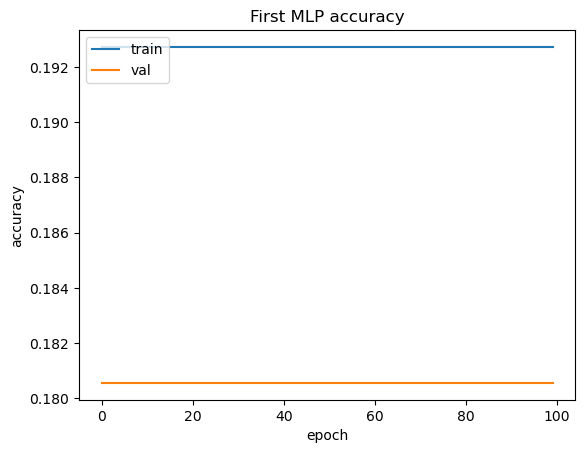

In [17]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('First MLP accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Loss against epochs

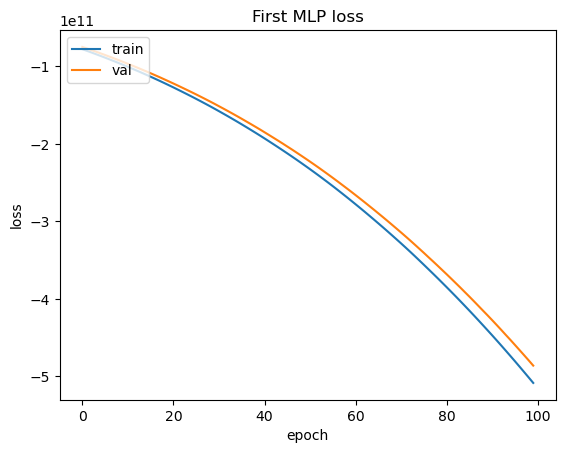

In [18]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('First MLP loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Confusion matrix:

In [19]:
conf = confusion_matrix(y_test, y_pred1)

### Second MLP model

Let's try adding a hidden layer to enhance the model's performance

Model Hyperparameters:
<ul>
    <li> Input layers: 1 </li>
    <li> Hidden layer: 3, 100 neurons </li>
    <li> Activation function in the hidden layer: "relu" </li>
    <li> output activation function: "sigmoid" </li>
    <li> opitimizer: "Adam" </li>
    <li>batch size= 32</li>
    <li>epochs= 100 </li>
<ul>

In [20]:
MLP2 = tf.keras.models.Sequential(layers = None, name= None)

In [21]:
MLP2.add(tf.keras.layers.Dense(units= 100, activation= 'relu'))

In [22]:
MLP2.add(tf.keras.layers.Dense(units= 100, activation= 'relu')) 

In [23]:
MLP2.add(tf.keras.layers.Dense(units= 100, activation= 'relu')) 

In [24]:
MLP2.add(tf.keras.layers.Dense(units= 1, activation= 'sigmoid')) 

In [25]:
MLP2.compile(optimizer= 'adam', loss= 'binary_crossentropy', metrics=['accuracy'])

In [26]:
MLP2.fit(x_train, y_train, batch_size= 32, epochs= 100)

Epoch 1/100
45/45 [==============================] - 2s 37ms/step - loss: -4468.6108 - accuracy: 0.1915
Epoch 2/100
45/45 [==============================] - 2s 36ms/step - loss: -131271.1250 - accuracy: 0.1915
Epoch 3/100
45/45 [==============================] - 2s 36ms/step - loss: -1143350.1250 - accuracy: 0.1915
Epoch 4/100
45/45 [==============================] - 1s 32ms/step - loss: -5111703.0000 - accuracy: 0.1915
Epoch 5/100
45/45 [==============================] - 2s 34ms/step - loss: -16354230.0000 - accuracy: 0.1915
Epoch 6/100
45/45 [==============================] - 2s 35ms/step - loss: -40216900.0000 - accuracy: 0.1915
Epoch 7/100
45/45 [==============================] - 2s 34ms/step - loss: -84527688.0000 - accuracy: 0.1915
Epoch 8/100
45/45 [==============================] - 2s 34ms/step - loss: -159958000.0000 - accuracy: 0.1915
Epoch 9/100
45/45 [==============================] - 2s 34ms/step - loss: -277704992.0000 - accuracy: 0.1915
Epoch 10/100
45/45 [==============

In [27]:
y_pred2= MLP2.predict(x_test)

12/12 [==============================] - 0s 32ms/step


#### Model Evaluation:

Learning curve:

Accuracy against epochs:

Epoch 1/100
323/323 [==============================] - 2s 6ms/step - loss: -3008962756608.0000 - accuracy: 0.1927 - val_loss: -3155455901696.0000 - val_accuracy: 0.1806
Epoch 2/100
323/323 [==============================] - 2s 5ms/step - loss: -3643297759232.0000 - accuracy: 0.1927 - val_loss: -3773789896704.0000 - val_accuracy: 0.1806
Epoch 3/100
323/323 [==============================] - 2s 5ms/step - loss: -4315881930752.0000 - accuracy: 0.1927 - val_loss: -4433260314624.0000 - val_accuracy: 0.1806
Epoch 4/100
323/323 [==============================] - 2s 5ms/step - loss: -5045134295040.0000 - accuracy: 0.1927 - val_loss: -5152608616448.0000 - val_accuracy: 0.1806
Epoch 5/100
323/323 [==============================] - 2s 5ms/step - loss: -5835921031168.0000 - accuracy: 0.1927 - val_loss: -5939715375104.0000 - val_accuracy: 0.1806
Epoch 6/100
323/323 [==============================] - 2s 5ms/step - loss: -6697022128128.0000 - accuracy: 0.1927 - val_loss: -6785770979328.0000 - val_acc

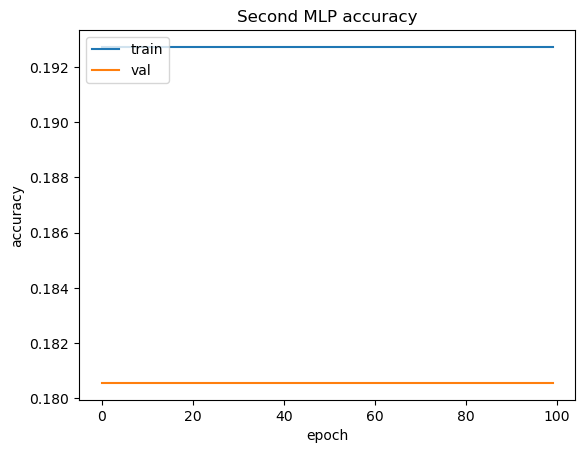

In [28]:
from matplotlib import pyplot as plt
history = MLP2.fit(x_train, y_train,validation_split = 0.1, epochs=100, batch_size=4)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Second MLP accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Loss against epochs

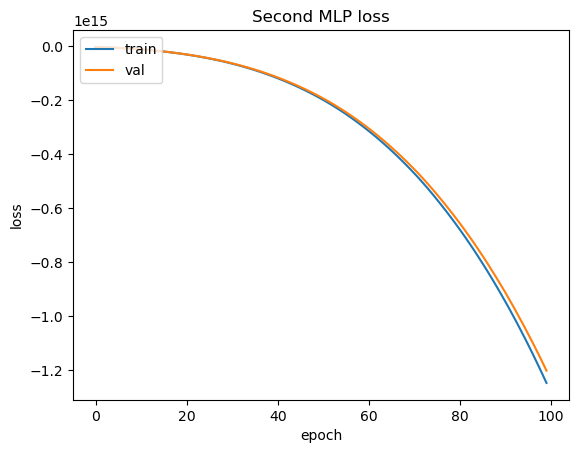

In [29]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Second MLP loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Confusion matrix:

In [30]:
conf = confusion_matrix(y_test, y_pred2)

### Third MLP model

We'll using the "momentum" optimizer

Model Hyperparameters:
<ul>
    <li> Input layers: 1 </li>
    <li> Hidden layer: 3, 150 neurons each </li>
    <li> Activation function in the hidden layer: "relu" </li>
    <li> output activation function: "sigmoid" </li>
    <li> opitimizer: "Momentum" </li>
    <li>batch size= 32</li>
    <li>epochs= 100 </li>
<ul>

In [31]:
MLP3 = tf.keras.models.Sequential(layers = None, name= None)

In [32]:
MLP3.add(tf.keras.layers.Dense(units= 150, activation= 'relu'))

In [33]:
MLP3.add(tf.keras.layers.Dense(units= 150, activation= 'relu')) 

In [34]:
MLP3.add(tf.keras.layers.Dense(units= 150, activation= 'relu')) 

In [35]:
MLP3.add(tf.keras.layers.Dense(units= 1, activation= 'sigmoid'))

In [38]:
momentum = tf.compat.v1.train.MomentumOptimizer(learning_rate=0.01, momentum=0.9)
MLP3.compile(optimizer= momentum, loss= 'binary_crossentropy', metrics=['accuracy'])

In [39]:
MLP3.fit(x_train, y_train, batch_size= 32, epochs= 100)

Epoch 1/100
45/45 [==============================] - 2s 30ms/step - loss: nan - accuracy: 0.1936
Epoch 2/100
45/45 [==============================] - 1s 23ms/step - loss: nan - accuracy: 0.2026
Epoch 3/100
45/45 [==============================] - 1s 23ms/step - loss: nan - accuracy: 0.2026
Epoch 4/100
45/45 [==============================] - 1s 26ms/step - loss: nan - accuracy: 0.2026
Epoch 5/100
45/45 [==============================] - 1s 21ms/step - loss: nan - accuracy: 0.2026
Epoch 6/100
45/45 [==============================] - 1s 25ms/step - loss: nan - accuracy: 0.2026
Epoch 7/100
45/45 [==============================] - 1s 29ms/step - loss: nan - accuracy: 0.2026
Epoch 8/100
45/45 [==============================] - 1s 26ms/step - loss: nan - accuracy: 0.2026
Epoch 9/100
45/45 [==============================] - 1s 26ms/step - loss: nan - accuracy: 0.2026
Epoch 10/100
45/45 [==============================] - 1s 24ms/step - loss: nan - accuracy: 0.2026
Epoch 11/100
45/45 [=========

In [40]:
y_pred3= MLP3.predict(x_test)

12/12 [==============================] - 0s 4ms/step


#### Model Evaluation:

Learning curve:

Accuracy against epochs:

Epoch 1/100
323/323 [==============================] - 2s 7ms/step - loss: nan - accuracy: 0.2012 - val_loss: nan - val_accuracy: 0.2153
Epoch 2/100
323/323 [==============================] - 2s 6ms/step - loss: nan - accuracy: 0.2012 - val_loss: nan - val_accuracy: 0.2153
Epoch 3/100
323/323 [==============================] - 2s 6ms/step - loss: nan - accuracy: 0.2012 - val_loss: nan - val_accuracy: 0.2153
Epoch 4/100
323/323 [==============================] - 2s 6ms/step - loss: nan - accuracy: 0.2012 - val_loss: nan - val_accuracy: 0.2153
Epoch 5/100
323/323 [==============================] - 2s 6ms/step - loss: nan - accuracy: 0.2012 - val_loss: nan - val_accuracy: 0.2153
Epoch 6/100
323/323 [==============================] - 2s 6ms/step - loss: nan - accuracy: 0.2012 - val_loss: nan - val_accuracy: 0.2153
Epoch 7/100
323/323 [==============================] - 2s 6ms/step - loss: nan - accuracy: 0.2012 - val_loss: nan - val_accuracy: 0.2153
Epoch 8/100
323/323 [====================

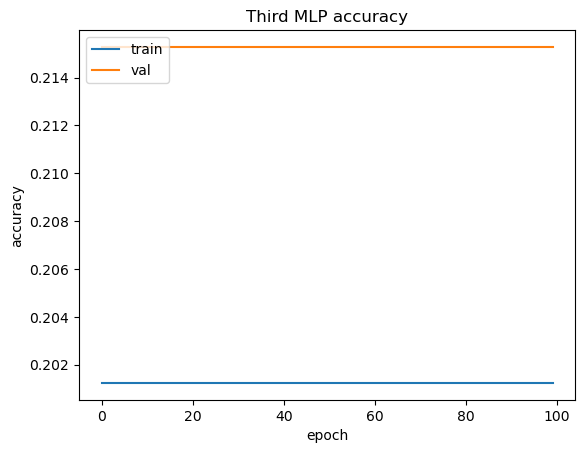

In [41]:
from matplotlib import pyplot as plt
history = MLP3.fit(x_train, y_train,validation_split = 0.1, epochs=100, batch_size=4)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Third MLP accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Loss against epochs

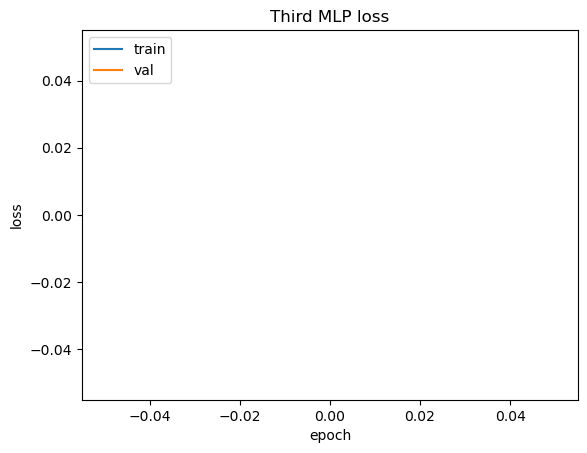

In [42]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Third MLP loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Confusion matrix:

In [55]:
conf = confusion_matrix(y_test, y_pred3)

ValueError: Input y_pred contains NaN.

## Training model on the images of size 64x64

In [47]:
x = pklLoad('../x64.pkl', convertToNumpyArray=True)
y = pklLoad('../y.pkl', convertToNumpyArray=True)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

### First MLP model

Model Hyperparameters:
<ul>
    <li> Input layers: 1 </li>
    <li> Hidden layer: 2, 50 layers each </li>
    <li> Activation function in the hidden layer: "relu" </li>
    <li> output activation function: "sigmoid" </li>
    <li> opitimizer: "Adam" </li>
    <li>batch size= 32</li>
    <li>epochs= 100 </li>
<ul>

In [48]:
MLP1_2 = tf.keras.models.Sequential(layers = None, name= None)

In [49]:
MLP1_2.add(tf.keras.layers.Dense(units= 50, activation= 'relu'))

In [50]:
MLP1_2.add(tf.keras.layers.Dense(units= 50, activation= 'relu'))

In [51]:
MLP1_2.add(tf.keras.layers.Dense(units= 1, activation= 'relu'))

In [52]:
MLP1_2.compile(optimizer= 'adam', loss= 'binary_crossentropy', metrics=['accuracy'])

In [53]:
MLP1_2.fit(x_train, y_train, batch_size= 32, epochs= 100)

Epoch 1/100
45/45 [==============================] - 2s 35ms/step - loss: -14.4330 - accuracy: 0.1922
Epoch 2/100
45/45 [==============================] - 2s 37ms/step - loss: -15.1324 - accuracy: 0.1915
Epoch 3/100
45/45 [==============================] - 2s 35ms/step - loss: -15.1324 - accuracy: 0.1915
Epoch 4/100
45/45 [==============================] - 2s 35ms/step - loss: -15.1324 - accuracy: 0.1915
Epoch 5/100
45/45 [==============================] - 2s 38ms/step - loss: -15.1324 - accuracy: 0.1915
Epoch 6/100
45/45 [==============================] - 2s 37ms/step - loss: -15.1324 - accuracy: 0.1915
Epoch 7/100
45/45 [==============================] - 2s 37ms/step - loss: -15.1324 - accuracy: 0.1915
Epoch 8/100
45/45 [==============================] - 2s 37ms/step - loss: -15.1324 - accuracy: 0.1915
Epoch 9/100
45/45 [==============================] - 2s 35ms/step - loss: -15.1324 - accuracy: 0.1915
Epoch 10/100
45/45 [==============================] - 2s 36ms/step - loss: -15.132

In [54]:
y_pred1_2= MLP1_2.predict(x_test)

12/12 [==============================] - 0s 36ms/step
